<a href="https://colab.research.google.com/github/Niger49/CSE3210_DSP/blob/main/DSP_lab3(Modulation_%26_Z_transformation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

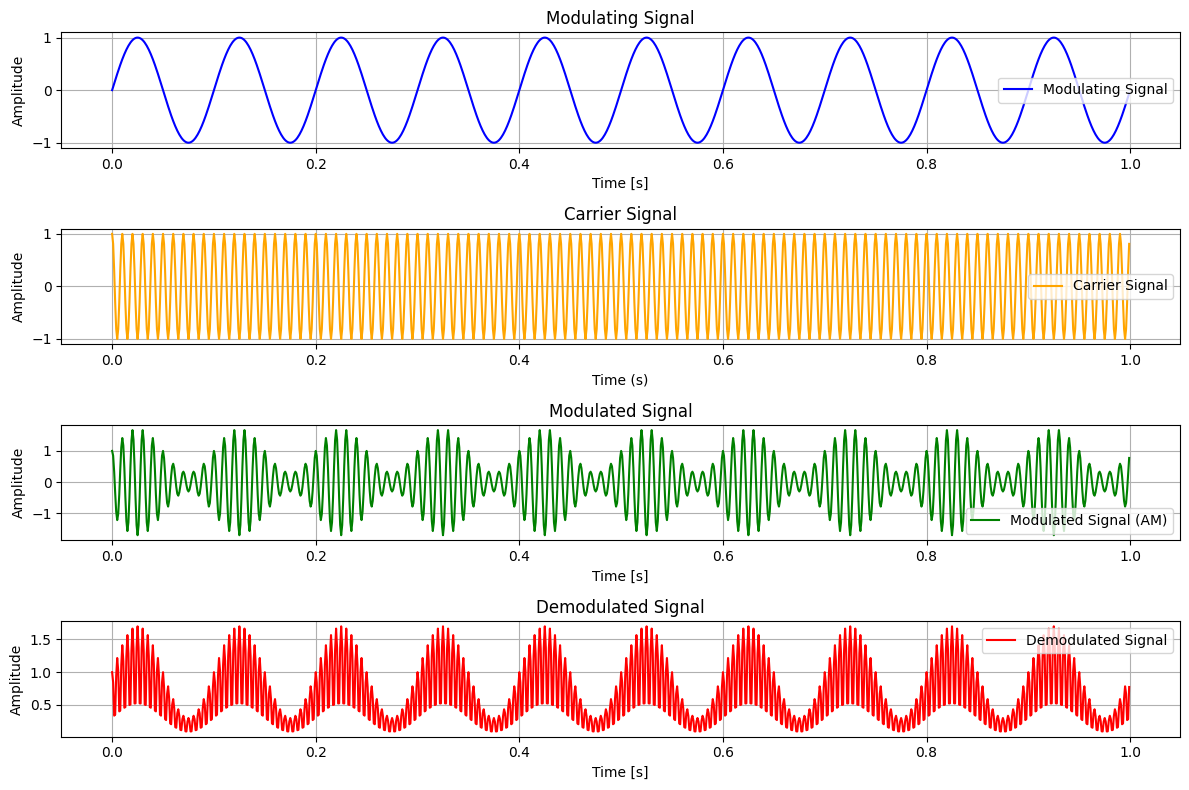

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Parameters
fs = 1000 #Sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)

# print(t)
# print("\n")

carrier_freq = 100
modulating_freq = 10
modulation_index = 0.7

#Generate Signals
carrier_signal = np.cos(2 * np.pi * carrier_freq * t)
modulating_signal = np.sin(2 * np.pi * modulating_freq * t)

#Modulation(Amplitude Modulation)
modulated_signal = (1 + modulation_index * modulating_signal)*carrier_signal

#Demodulation
demodulated_signal = np.abs(modulated_signal - np.mean(modulated_signal))

#Plot Signals
plt.figure(figsize=(12, 8))

#Original modulating Signal
plt.subplot(4, 1, 1)
plt.plot(t, modulating_signal, label='Modulating Signal', color='blue')
plt.title('Modulating Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

#Carrier Signal
plt.subplot(4, 1, 2)
plt.plot(t, carrier_signal, label='Carrier Signal', color='orange')
plt.title('Carrier Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

#Modulated Signal
plt.subplot(4, 1, 3)
plt.plot(t, modulated_signal, label='Modulated Signal (AM)', color='green')
plt.title('Modulated Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

#Demodulated Signal
plt.subplot(4, 1, 4)
plt.plot(t, demodulated_signal, label='Demodulated Signal', color='red')
plt.title('Demodulated Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

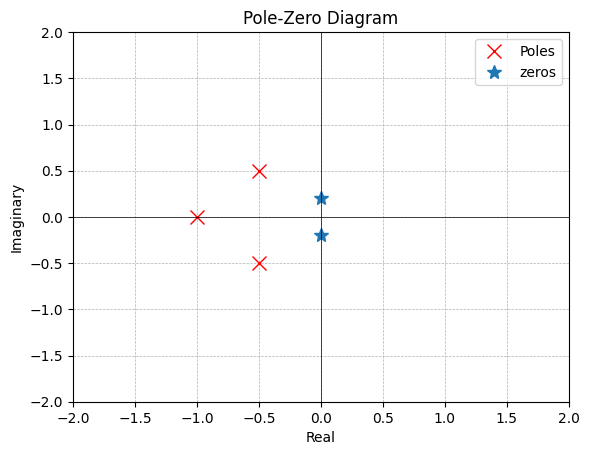

In [3]:
#Z transformation

import numpy as np
import matplotlib.pyplot as plt

def plot_pole_zero(poles, zeros):
  fig, ax = plt.subplots()

  #plotting poles.
  ax.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Poles')

  #plotting zeros.
  ax.plot(np.real(zeros), np.imag(zeros), '*', markersize=10, label='zeros')

  #set plotting attributes.
  ax.axhline(0, color='black', linewidth=0.5)
  ax.axvline(0, color='black', linewidth=0.5)
  ax.grid(True, which='both', linestyle='--', linewidth=0.5)
  ax.legend()

  ax.set_xlabel('Real')
  ax.set_ylabel('Imaginary')
  ax.set_title('Pole-Zero Diagram')

#plotting limits.
  ax.set_xlim([-2,2])
  ax.set_ylim([-2,2])
  plt.show()

poles = [-0.5+0.5j, -0.5-0.5j, -1.0]
zeros = [0.2j, -0.2j]

plot_pole_zero(poles, zeros)



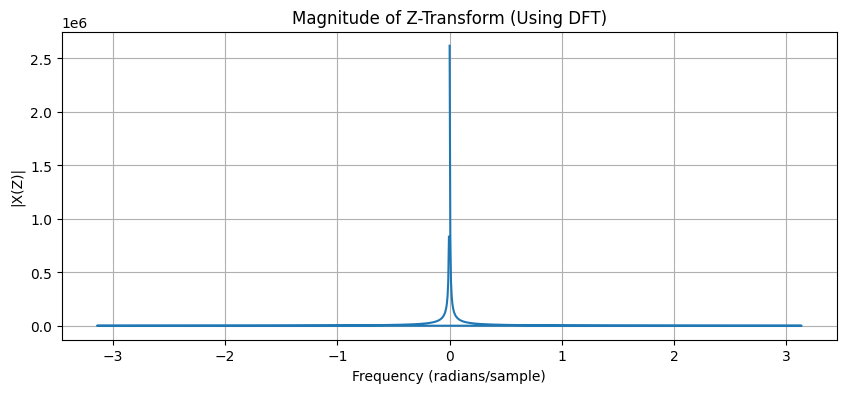

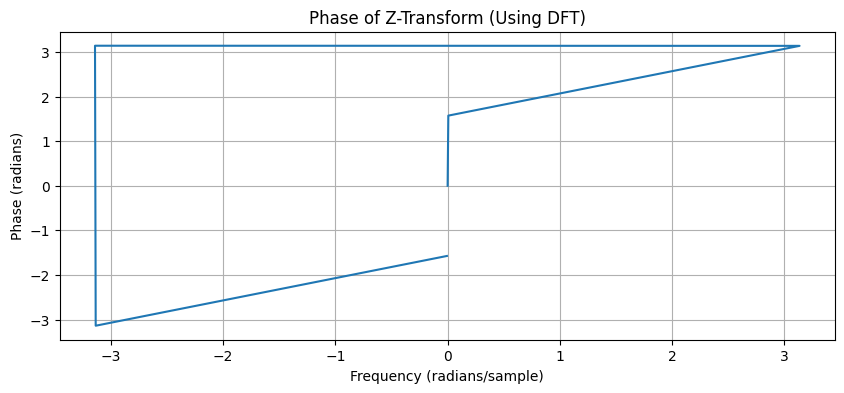

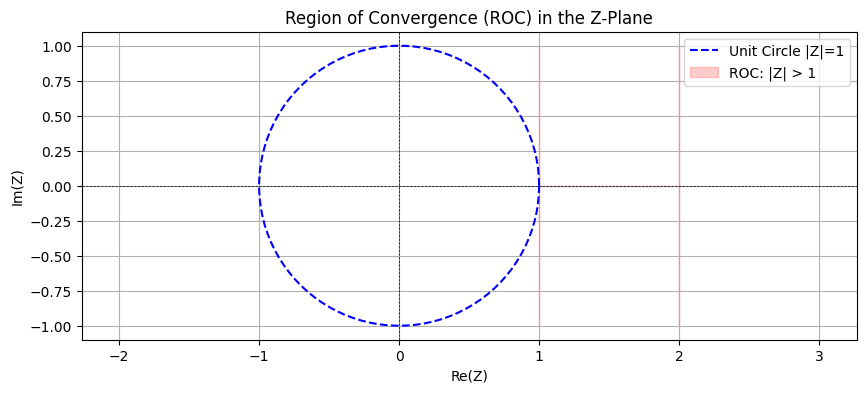

Estimated ROC: |Z| > 1


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define Parameters
N = 1024  # Number of DFT points
n = np.arange(N)  # Time index

# Define the signal x[n] = 5n * u[n]
x_n = 5 * n  # Since u[n] is implicit for n >= 0

# Compute the DFT using FFT (Z-Transform Approximation)
#DFT/FFT (Fast Fourier Transform) computes the frequency content of a signal over the unit circle in the Z-plane (i.e., |Z| = 1).

X_Z = np.fft.fft(x_n, N) #Output X_Z is the frequency-domain version of x[n].

# Frequency axis (mapped to the unit circle in the Z-plane)
omega = np.fft.fftfreq(N, d=1) * 2 * np.pi  # Normalized frequency -> np.fft.fftfreq gives normalized frequency from 0 to ±π.

# --- Plot Magnitude Response ---
plt.figure(figsize=(10, 4))
plt.plot(omega, np.abs(X_Z))
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("|X(Z)|")
plt.title("Magnitude of Z-Transform (Using DFT)")
plt.grid()
plt.show()

# --- Plot Phase Response ---
plt.figure(figsize=(10, 4))
plt.plot(omega, np.angle(X_Z))
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("Phase (radians)")
plt.title("Phase of Z-Transform (Using DFT)")
plt.grid()
plt.show()

# --- ROC Visualization in the Z-Plane ---
theta = np.linspace(0, 2 * np.pi, 100)  # Angles for a circle

# print(theta)

# Unit circle (|Z|=1)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)

# ROC boundary circle (|Z|=1)
roc_circle_x = np.cos(theta)
roc_circle_y = np.sin(theta)

# Plot ROC in the Z-Plane
plt.figure(figsize=(10, 4))
plt.plot(unit_circle_x, unit_circle_y, 'b--', label="Unit Circle |Z|=1")  # Unit circle
plt.fill_betweenx(roc_circle_y, 1, max(roc_circle_x)*2, color='red', alpha=0.2, label="ROC: |Z| > 1")
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.title("Region of Convergence (ROC) in the Z-Plane")
plt.legend()
plt.grid()
plt.axis("equal")  # Equal scaling
plt.show()

# Print ROC estimation
roc_boundary = 1  # ROC boundary (|Z| > 1)
#For causal signals (like this one), the ROC is outside the outermost pole (often |Z| > something).

print(f"Estimated ROC: |Z| > {roc_boundary}")


[0 1 2 3 4]


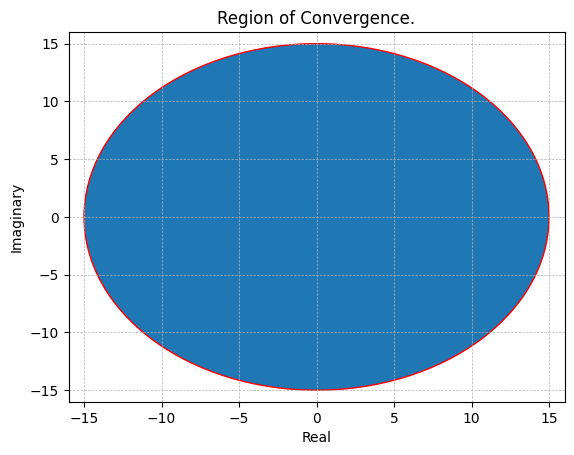

Z Transformation values...
Z[0]: (15+0j)
Z[1]: (-2.500000000000001+3.4409548011779334j)
Z[2]: (-2.5+0.8122992405822647j)
Z[3]: (-2.499999999999999-0.8122992405822673j)
Z[4]: (-2.4999999999999956-3.440954801177935j)
ROC: |Z| < 15.0


In [5]:
def Z_Transformation(signal, n):
  N = len(signal)
  Z = np.zeros(N, dtype=complex)  #1d Array

  for k in range(N):
    Z[k] = np.sum(signal * np.exp(-1j*2*np.pi*n*k/N))  #e^(-j*omega*n)

  roc = 'Entire Z-Plane'
  if np.abs(Z).any():   #This checks if any element in Z has a non-zero magnitude. If yes, it assumes the signal has a meaningful Z-transform.
    roc = 'ROC: |Z| < {}'.format(np.max(np.abs(Z)))

  return Z, roc

signal = [1,2,3,4,5]
n = np.arange(len(signal))

print(n)

Z, roc = Z_Transformation(signal, n)
#plotting ROC.
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), radius=np.max(np.abs(Z)), edgecolor='r')
ax.add_patch(circle)
plt.xlim(-np.max(np.abs(Z))-1, np.max(np.abs(Z))+1 )
plt.ylim(-np.max(np.abs(Z))-1, np.max(np.abs(Z))+1 )

plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Region of Convergence.')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

#printing the values of Z.
print('Z Transformation values...')
for i, z in enumerate(Z):
  print('Z[{}]: {}'.format(i,z))
print(roc)